In [1]:
import pandas as pd
import numpy as np
import umap
import scanpy as sc

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

/Users/benceszalai/opt/anaconda3/envs/scanpy/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


In [55]:
data = pd.read_csv('../data/scrnaseq/test_mat.csv', sep=',', header=0, index_col=0)

In [56]:
meta = pd.read_csv('../data/scrnaseq/meta_data_smartseq2.csv', sep=',', header=0, index_col=0)

In [57]:
meta.head()

,nnet2,ident,technology
cell,,,
SMARTseqFINAL_allLanes_AACATCCGAAGAGAGG,NK cells,NK cells,Smart-Seq2
SMARTseqFINAL_allLanes_AACATCCGCAGTATCG,NK cells,NK cells,Smart-Seq2
SMARTseqFINAL_allLanes_AACATCCGCCTCCTAA,B cells,B cells,Smart-Seq2
SMARTseqFINAL_allLanes_AACATCCGCGAATCTG,NK cells,NK cells,Smart-Seq2
SMARTseqFINAL_allLanes_AACATCCGCGCCTATA,NK cells,NK cells,Smart-Seq2


In [58]:
data.head()

,SMARTseqFINAL_allLanes_AACATCCGAAGAGAGG,SMARTseqFINAL_allLanes_AACATCCGCAGTATCG,SMARTseqFINAL_allLanes_AACATCCGCCTCCTAA,SMARTseqFINAL_allLanes_AACATCCGCGAATCTG,SMARTseqFINAL_allLanes_AACATCCGCGCCTATA,SMARTseqFINAL_allLanes_AACATCCGCGGAAGAA,SMARTseqFINAL_allLanes_AACATCCGCGGCATTA,SMARTseqFINAL_allLanes_AACATCCGCTATGTGG,SMARTseqFINAL_allLanes_AACATCCGGAATCCAG,SMARTseqFINAL_allLanes_AACATCCGGAGGAGAA,...,SMARTseqFINAL_allLanes_TTGTCGTGCCTGAGAA,SMARTseqFINAL_allLanes_TTGTCGTGCTAAGCAG,SMARTseqFINAL_allLanes_TTGTCGTGGACACCAA,SMARTseqFINAL_allLanes_TTGTCGTGGCGACTAA,SMARTseqFINAL_allLanes_TTGTCGTGGCTTGCTA,SMARTseqFINAL_allLanes_TTGTCGTGGTGAGGAA,SMARTseqFINAL_allLanes_TTGTCGTGGTTGACCA,SMARTseqFINAL_allLanes_TTGTCGTGTCGTGGTA,SMARTseqFINAL_allLanes_TTGTCGTGTCTCGGAA,SMARTseqFINAL_allLanes_TTGTCGTGTGATCCGA
TSPAN6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,3.186911,0.0,0.0,0.000000
DPM1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.701919,...,0.0,0.000000,0.0,3.222570,0.0,0.0,2.337225,0.0,0.0,0.000000
SCYL3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,1.009579,0.0,0.0,0.000000
C1orf112,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
FGR,0.0,3.710542,3.304465,4.164365,1.621903,3.442635,0.0,0.0,0.0,0.000000,...,0.0,4.441022,0.0,2.233954,0.0,0.0,0.000000,0.0,0.0,3.087333


In [59]:
data = data[meta.index]

In [60]:
fil = meta['nnet2'] != 'HEK cells'
meta = meta[fil]
data = data[data.columns[fil]]

In [61]:
data = data[data.mean(1) != 0]

In [62]:
data.shape

(17021, 623)

In [63]:
model = umap.UMAP()

In [64]:
data_umap = model.fit_transform(data.T)

In [65]:
data_umap = pd.DataFrame(data_umap, index=data.columns, columns=['UMAP1', 'UMAP2'])

In [66]:
data_umap = data_umap.loc[meta.index]

In [67]:
data_umap['Cell'] = meta.loc[data_umap.index, 'nnet2']

In [68]:
data_umap.head()

,UMAP1,UMAP2,Cell
cell,,,
SMARTseqFINAL_allLanes_AACATCCGAAGAGAGG,2.585949,9.533819,NK cells
SMARTseqFINAL_allLanes_AACATCCGCAGTATCG,2.558304,8.852983,NK cells
SMARTseqFINAL_allLanes_AACATCCGCCTCCTAA,4.400710,-3.947250,B cells
SMARTseqFINAL_allLanes_AACATCCGCGAATCTG,2.677900,9.470150,NK cells
SMARTseqFINAL_allLanes_AACATCCGCGCCTATA,2.954403,9.019343,NK cells


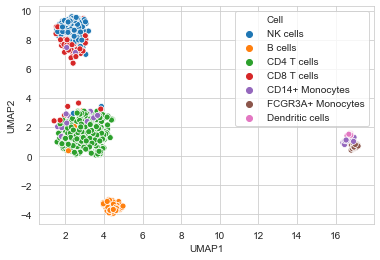

In [69]:
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Cell'])

In [183]:
data_umap['Expression'] = data.loc['IL2RA']

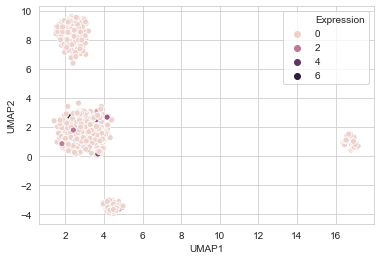

In [184]:
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Expression'])

In [72]:
nn = pd.read_csv('../results/nn_scrnaseq_scaled.csv', sep=',', header=0, index_col=0)

In [37]:
nn_model = pd.read_csv('../data/ligand_target_matrix.csv', sep=',', header=0, index_col=0)

In [79]:
common_genes = list(set(nn.index) & set(nn_model.index))

In [82]:
nn_score = pd.concat([nn_model.loc[common_genes], nn.loc[common_genes]], 1).corr()

In [165]:
nn_activity = nn_score.loc[nn_model.columns, nn.columns]

In [166]:
nn_activity_norm = ((nn_activity.T - nn_activity.mean(1)) / nn_activity.std(1)).T

In [167]:
nn_activity_norm = (nn_activity_norm - nn_activity_norm.mean()) / nn_activity_norm.std()

In [181]:
ligand = 'IL2'
data_umap['Activity'] = nn_activity_norm.loc[ligand]

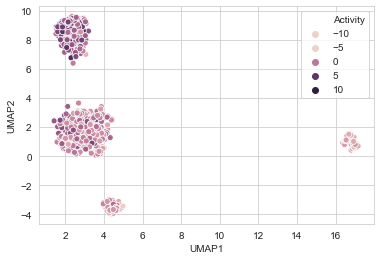

In [182]:
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Activity'])

In [170]:
average_activity = nn_activity_norm.T
average_activity['Cell_type'] = meta.loc[nn_activity_norm.columns, 'nnet2']
average_activity = average_activity.groupby('Cell_type').mean()

In [180]:
average_activity.loc['CD8 T cells'].sort_values()

TENM3      -0.979656
SERPINC1   -0.778733
NDP        -0.772356
CCL15      -0.759910
DKK1       -0.755915
              ...   
IL15        1.369889
IL12B       1.582466
IL12A       1.649399
IL2         1.981231
CLDN24           NaN
Name: CD8 T cells, Length: 688, dtype: float64

In [132]:
average_activity

,CXCL1,CXCL2,CXCL3,CXCL5,PPBP,CXCL6,CXCL8,CXCL9,CXCL10,CXCL11,...,PCDHGB1,CDH6,CDH9,CDH12,CDH18,PCDHB16,PCDHA7,PCDHA6,PCDHA4,PCDHA12
Cell_type,,,,,,,,,,,,,,,,,,,,,
B cells,-0.109884,0.052272,-0.027145,-0.022601,-0.005557,-0.070821,-0.134378,-0.024815,-0.118784,-0.055725,...,-0.083784,0.375203,0.356546,0.293804,0.296374,0.234954,-0.073638,0.139528,-0.136329,0.049847
CD14+ Monocytes,0.972156,0.983885,1.016429,1.006994,1.019110,0.980994,0.795201,0.923133,0.843265,1.016122,...,0.856104,0.487211,0.502270,0.800630,0.585425,0.902737,0.944016,0.815035,0.689353,0.839805
CD4 T cells,-0.296470,-0.372367,-0.315462,-0.302300,-0.281346,-0.296450,-0.298921,-0.365042,-0.353819,-0.303980,...,-0.205363,-0.143524,-0.142092,-0.268762,-0.229337,-0.391270,-0.292667,-0.215647,-0.157642,-0.194698
CD8 T cells,-0.224780,-0.220729,-0.269828,-0.226010,-0.284118,-0.302347,-0.230321,-0.133770,-0.138718,-0.230327,...,-0.282450,-0.275163,-0.276259,-0.321123,-0.312833,-0.233608,-0.230410,-0.310374,-0.277581,-0.367103
Dendritic cells,2.463053,2.695571,2.680142,2.473104,2.614140,2.718563,2.339960,2.473424,2.385454,2.541628,...,2.459979,2.152228,2.149243,2.636453,2.594791,2.898169,2.209240,2.559538,2.601595,2.524816
FCGR3A+ Monocytes,2.170008,2.194374,2.181297,2.089295,2.020307,2.140865,1.712708,1.961027,2.025694,2.069673,...,1.876981,1.350825,1.354560,1.825932,1.627161,2.318018,1.857251,1.799855,1.817871,1.907054
NK cells,-0.028512,0.035890,-0.034955,-0.051763,-0.080341,-0.026565,0.140111,0.094863,0.133160,-0.032782,...,-0.136378,-0.295279,-0.292691,-0.152563,-0.153554,-0.029762,0.039851,-0.194918,-0.183076,-0.193513
